<a href="https://colab.research.google.com/github/yukti-kaura/yuktik.github.io/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from scipy import stats
from tabulate import tabulate
from IPython.display import HTML, display
from datetime import datetime
import dateutil.parser




In [58]:
df = pd.read_csv("/content/latlongdataset.csv",low_memory=False)
print(f'latlongdataset.csv : {df.shape}')
df.count()
df = df[pd.to_numeric(df["LAT"]) < 15]
df.head(3)
df.count()

latlongdataset.csv : (1048575, 5)


NODE      861907
LAT       861907
LNG       861907
TIME      861907
ACTIVE    861907
dtype: int64

In [47]:
df_distinct_node = df.groupby(['NODE'], as_index=False)["LAT"].count()
df_distinct_node.head(100)
df_distinct_node.count()
df_distinct_node.sort_values(by='LAT', ascending=False)

,NODE,LAT
2529,23025,9720
605,5276,8920
1491,13509,6134
2449,22278,5458
868,7817,4424
...,...,...
2842,25952,2
2561,23301,2
1374,12465,2
2509,22857,1


In [42]:
df_distinct_lc = df.groupby(['LAT', 'LNG'], as_index=False)["NODE"].count()
df_distinct_lc.head(10)
df_distinct_lc.sort_values(by='NODE', ascending=False)
# df_distinct_lc.count()

,LAT,LNG,NODE
3358,26.078157,19.235978,50101
3632,34.085312,40.554456,9720
3593,33.962383,40.087937,8920
3529,33.746665,40.245480,6134
3518,33.714865,40.344071,5458
...,...,...,...
3241,13.387172,5.095219,2
2198,12.227975,5.816974,2
3226,13.369038,3.573440,2
3315,13.566327,5.074663,1


In [3]:
def get_timestamp(strdate):
    timestampparsed = dateutil.parser.parse(strdate, dayfirst=True).timestamp()
    return timestampparsed

In [4]:
df_filtered = df[(df["NODE"] == 33989)]
df_filtered = df_filtered[df_filtered["ACTIVE"]== 1]
df_filtered1 = df[(df["NODE"] == 5276)]
df_filtered1 = df_filtered1[df_filtered1["ACTIVE"]== 1]
df_filtered2 = df[(df["NODE"] == 24810)]
df_filtered2 = df_filtered2[df_filtered2["ACTIVE"]== 1]
# df_filtered.head(10)
# df_filtered.count()

In [ ]:
df_filtered['timestamp'] = df_filtered['TIME'].apply(get_timestamp)
df_filtered['datetime'] = df_filtered['timestamp'].apply(datetime.fromtimestamp)
df_filtered.head(995)

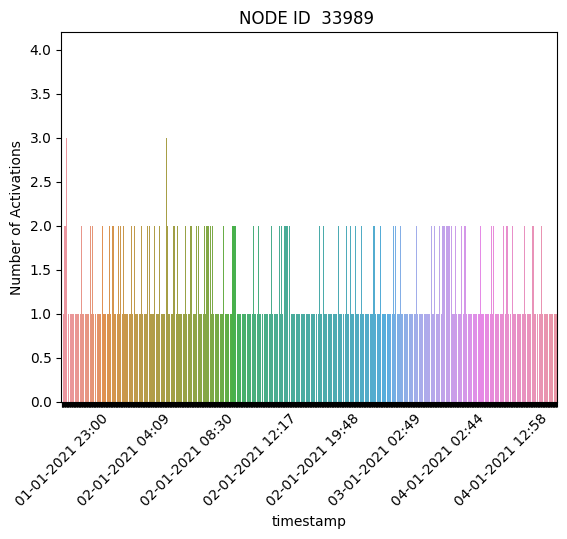

In [6]:

### NODE ID 33989
plot_ = sns.countplot(x="TIME", data=df_filtered )
plot_.set(title="NODE ID  33989 ", xlabel='timestamp', ylabel='Number of Activations' )
plot_.set_xticklabels(plot_.get_xticklabels(),rotation=45)
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 100 == 0:  # every 100th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)





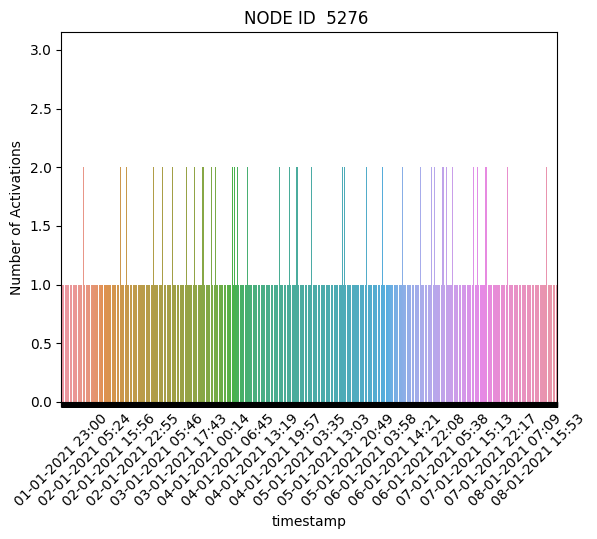

In [7]:
### NODE ID 5276
plot1_ = sns.countplot(x="TIME", data=df_filtered1 )
plot1_.set(title="NODE ID  5276 ", xlabel='timestamp', ylabel='Number of Activations' )
plot1_.set_xticklabels(plot1_.get_xticklabels(),rotation=45)
for ind, label in enumerate(plot1_.get_xticklabels()):
    if ind % 200 == 0:  # every 200th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

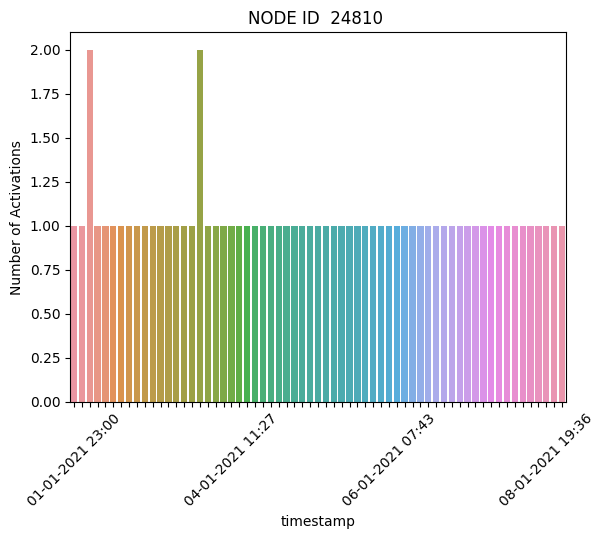

In [8]:
### NODE ID 24810
plot2_ = sns.countplot(x="TIME", data=df_filtered2 )
plot2_.set(title="NODE ID  24810 ", xlabel='timestamp', ylabel='Number of Activations' )
plot2_.set_xticklabels(plot2_.get_xticklabels(),rotation=45)
for ind, label in enumerate(plot2_.get_xticklabels()):
    if ind % 20== 0:  # every 20th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

<ipython-input-54-01c0f22a9a7b>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


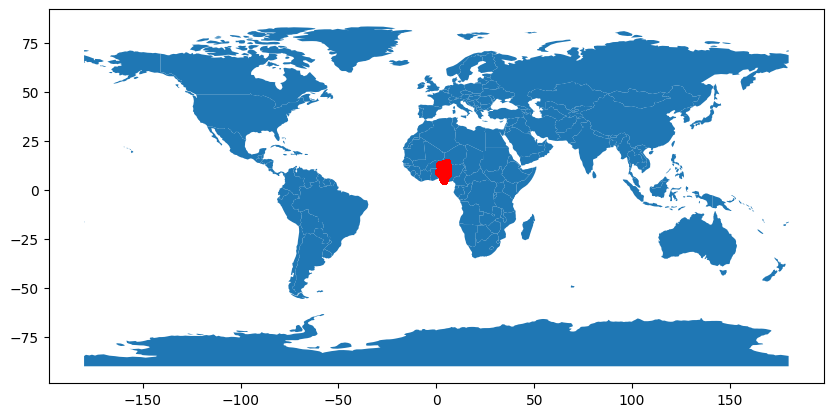

In [54]:

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['LNG'], df['LAT'])]
gdf = GeoDataFrame(df, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

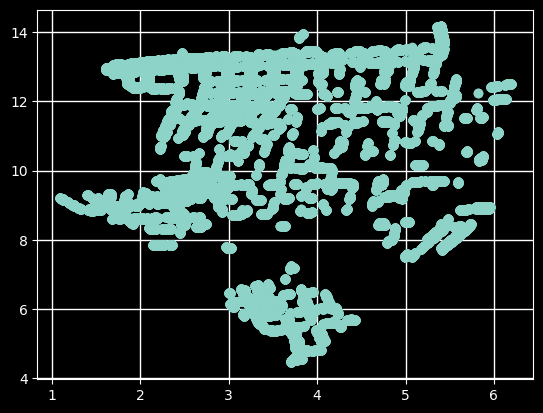

In [57]:
plt.style.use('dark_background')
plt.scatter(x=df['LNG'], y=df['LAT'])
plt.show()